<a href="https://colab.research.google.com/github/g1uLiax/uek259-ai/blob/main/multi_view_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-view Diffusion

Multi-view diffusion is a type of diffusion model that turns an image of an object into multiple views of that object.

## Setup

Install the required libraries.

Here, we use a custom [requirements file](https://huggingface.co/spaces/dylanebert/multi-view-diffusion/blob/main/requirements.txt) to install a large number of dependencies. This is because the [Diffusers](https://huggingface.co/docs/diffusers/en/index) library doesn't officially support multi-view diffusion.

In [5]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of accelerate to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of accelerate to determine which version is compatible with other requirements. This could take a while.
INFO: This is tak

## Pipeline

Create a multi-view diffusion pipeline. Diffusers doesn't officially support multi-view-diffusion, so we load a [custom pipeline](https://huggingface.co/docs/diffusers/v0.6.0/en/using-diffusers/custom_pipelines).

In [1]:
import torch
from diffusers import DiffusionPipeline

multi_view_diffusion_pipeline = DiffusionPipeline.from_pretrained(
    "ev1e/3dmodel",
    custom_pipeline="dylanebert/multi-view-diffusion",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when poss

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/521 [00:00<?, ?B/s]

pipeline.py: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/484 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/428 [00:00<?, ?B/s]

mv_unet.py: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Load the input image.

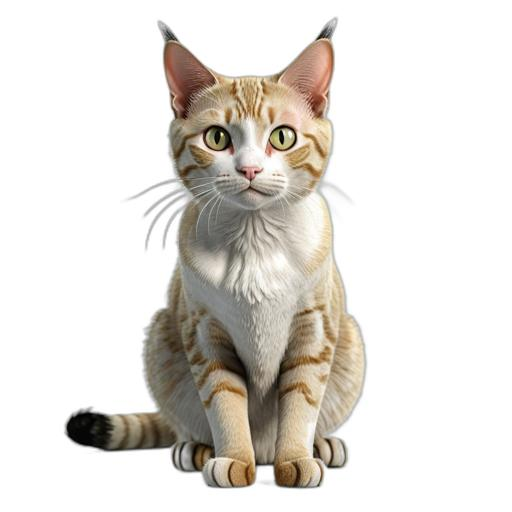

In [2]:
import requests
from PIL import Image
from io import BytesIO


image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/a_cat.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

Pass the image through the multi-view diffusion pipeline.

  0%|          | 0/30 [00:00<?, ?it/s]

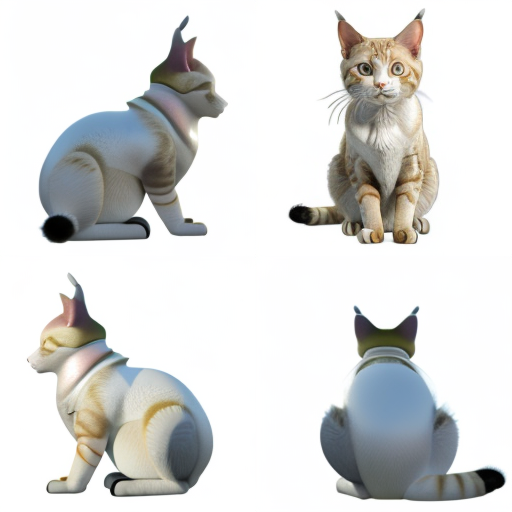

In [17]:
import numpy as np
image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/a_cat.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

def create_image_grid(images):
    images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

    width, height = images[0].size
    grid_img = Image.new("RGB", (2 * width, 2 * height))

    grid_img.paste(images[0], (0, 0))
    grid_img.paste(images[1], (width, 0))
    grid_img.paste(images[2], (0, height))
    grid_img.paste(images[3], (width, height))

    return grid_img

image = np.array(image, dtype=np.float32) / 255.0
images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0)


create_image_grid(images)

## Gradio Demo

In [15]:
import gradio as gr

def run(image, elevation):
  image = np.array(image, dtype=np.float32) / 255.0
  images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=elevation)

  images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

  width, height = images[0].size
  grid_img = Image.new("RGB", (2 * width, 2 * height))

  grid_img.paste(images[0], (0, 0))
  grid_img.paste(images[1], (width, 0))
  grid_img.paste(images[2], (0, height))
  grid_img.paste(images[3], (width, height))

  return grid_img

demo = gr.Interface(
    fn=run,
    inputs=[
        gr.Image(type="pil"),
        gr.Slider(minimum=-10, maximum=10, step=1, value=2, label="Elevations")
    ],
    outputs="image"

)
# elevation: angle from where cat is looked at

demo.launch()

IMPORTANT: You are using gradio version 4.24.0, however version 4.44.1 is available, please upgrade.
--------
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2105614c3542028f7f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Differentiable

Differenzierbar
triangle rasterization isnt diferentiable since it includes discrete descisions, for example is the pixel inside the triangle or outside? Neural networks dont like discrete decisions, they want everything to be differentiable.

Splats are composed of millions of points, each point has 4 parameters:
- Position xyz
- Covariance: how its stretched 3x3 matrix
- Color rgb
- Alpha transparency a

to rasterize a splat, points are projected into 2d.